In [6]:
!pip install cufflinks

  Using cached cufflinks-0.17.3-py3-none-any.whl
  Using cached colorlover-0.3.0-py3-none-any.whl.metadata (421 bytes)
  Using cached fqdn-1.5.1-py3-none-any.whl.metadata (1.4 kB)
  Using cached isoduration-20.11.0-py3-none-any.whl.metadata (5.7 kB)
  Using cached uri_template-1.3.0-py3-none-any.whl.metadata (8.8 kB)
  Using cached webcolors-1.13-py3-none-any.whl.metadata (2.6 kB)
Using cached colorlover-0.3.0-py3-none-any.whl (8.9 kB)
Using cached webcolors-1.13-py3-none-any.whl (14 kB)
Using cached fqdn-1.5.1-py3-none-any.whl (9.1 kB)
Using cached isoduration-20.11.0-py3-none-any.whl (11 kB)
Using cached uri_template-1.3.0-py3-none-any.whl (11 kB)


In [ ]:
import numpy as np
import pandas as pd
import nltk
nltk.download()
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
from textblob import TextBlob
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
%matplotlib inline
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected = True)
cf.go_offline();
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import warnings 
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.max_columns', None)


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [ ]:
df = pd.read_csv("amazon.csv")

In [ ]:
df.head()

In [ ]:
df

In [ ]:
df = df.sort_values("wilson_lower_bound", ascending = False)
df.drop('Unnamed: 0', inplace = True,axis=1)
df.head()

In [ ]:
import pandas as pd
import numpy as np

def missing_values_analysis(df):
    na_columns_ = [col for col in df.columns if df[col].isnull().sum() > 0]
    n_miss = df[na_columns_].isnull().sum().sort_values(ascending=True)
    ratio_ = (df[na_columns_].isnull().sum() / df.shape[0] * 100).sort_values(ascending=True)
    missing_df = pd.concat([n_miss, np.round(ratio_, 2)], axis=1, keys=['Missing Values', 'Ratio'])
    missing_df = pd.DataFrame(missing_df)
    return missing_df

def check_dataframe(df, head=5, tail=5):
    print("SHAPE".center(82, '~'))
    print('ROWS: {}'.format(df.shape[0]))
    print('columns: {}'.format(df.shape[1]))
    print("TYPES".center(82, '~'))
    print(df.dtypes)
    print("".center(82, '~'))
    print(missing_values_analysis(df))
    print('DUPLICATED VALUES'.center(83, '~'))
    print(df.duplicated().sum())
    print("QUANTILES".center(82, '~'))
    
    
    numeric_cols = df.select_dtypes(include=np.number).columns
    if len(numeric_cols) > 0:
        print(df[numeric_cols].quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)
    else:
        print("No numeric columns found to compute quantiles.")


check_dataframe(df)



In [ ]:


def check_class(dataframe):
    nunique_df = pd.DataFrame({'Variable': dataframe.columns,
                               'Classes': [dataframe[i].nunique() for i in dataframe.columns]})
    nunique_df = nunique_df.sort_values('Classes', ascending=False)
    nunique_df = nunique_df.reset_index(drop=True)
    return nunique_df
result = check_class(df)
print(result)


In [ ]:
from plotly.subplots import make_subplots
print(result)

import plotly.graph_objects as go

constraints = ['#B34D22', '#EBE00C', '#1FEB0C', '#0C92EB', '#EB0CD5']

def categorical_variable_summary(df, column_name):
    fig = make_subplots(rows=1, cols=2,
                        subplot_titles=('Countplot', 'Percentage'),
                        specs=[[{"type": "xy"}, {'type': 'domain'}]])
    
    fig.add_trace(go.Bar(y=df[column_name].value_counts().values.tolist(),
                         x=[str(i) for i in df[column_name].value_counts().index],
                         text=df[column_name].value_counts().values.tolist(),
                         textfont=dict(size=14),
                         name=column_name,
                         textposition='auto',
                         showlegend=False,
                         marker=dict(color=constraints,
                                     line=dict(color='#DBE6EC', width=1))),
                  row=1, col=1)
    
    fig.add_trace(go.Pie(labels=df[column_name].value_counts().keys(),
                         values=df[column_name].value_counts().values.tolist(),  # Corrected this line
                         textposition='auto',
                         showlegend=False,
                         name=column_name,
                        marker=dict(colors=constraints)),

                  row=1, col=2)
    
    fig.update_layout(title={'text': column_name,
                             'y': 0.9,
                             'x': 0.5,
                             'xanchor': 'center',
                             'yanchor': 'top'},
                      template='plotly_white')
    
    fig.show()


In [ ]:
categorical_variable_summary(df, 'overall')

In [ ]:
df.reviewText.head()

In [ ]:
review_example = df.reviewText[2031]

review_example

In [ ]:
review_example = review_example.lower().split()

In [ ]:
review_example

In [ ]:
rt = lambda x: re.sub("[^a-zA_Z]",' ',str(x))
df["reviewText"] = df["reviewText"].map(rt)
df["reviewText"] = df["reviewText"].str.lower()
df.head()

In [ ]:
!pip install vaderSentiment

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [ ]:
df[['polarity','subjectivity']] = df['reviewText'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))


        

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()
for index, row in df['reviewText'].items():
    score = sid.polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    if neg > pos:
        df.loc[index, 'sentiment'] = "Negative"
    elif pos > neg:
        df.loc[index, 'sentiment'] = "Positive"
    else:
        df.loc[index, 'sentiment'] = "Neutral"


In [ ]:
df[df["sentiment"] == "Positive"].sort_values("wilson_lower_bound",
                                             ascending = False).head(5)

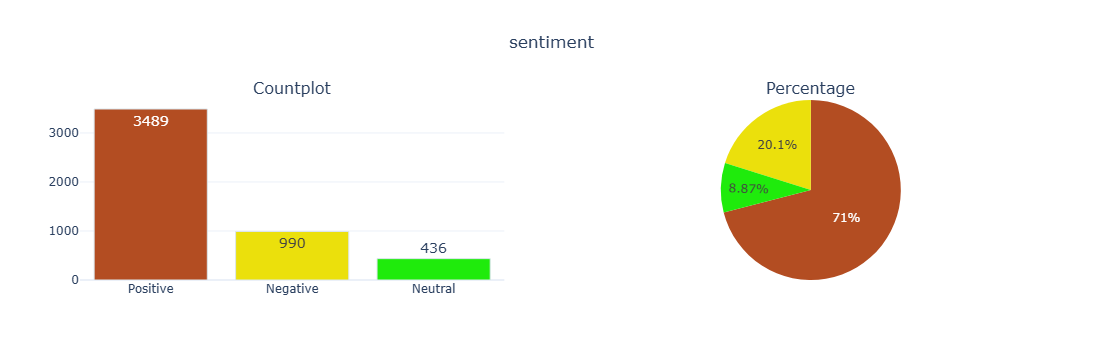

In [30]:
categorical_variable_summary(df,'sentiment')